In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth
file = 'publication_database.csv'

ecdatabase = database.Database(file)
ecdatabase.load_models()
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('garnet')

/Volumes/MT_RESEARCH/2D_Petrology/mineral_conductivity/mineralconductivities/pyrrhenious/database.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subframe['grouping_id'] = subframe['entry_id'].str.slice(stop=-5)


# Exploring Pyrrhenious's Garnet Models Self Consistency

Here we look at the garnet models of:

 * Xu S. and Shankland Thomas J., 1999. Electrical conductivity of orthopyroxene and its high pressure phases

 * Yoshino et al., 2008. Electrical conductivity of majorite garnet and its implications for electrical structure in the mantle transition zone
 
 * Dai K. and Karato S. 2009. Electrical conductivity of pyrope-rich garnet at high temperature and high pressure
 
 * Dai et al., 2012. The effect of chemical composition and oxygen fugacity on the electrical conductivity of dry and hydrous garnet at high temperatures and pressures
 
 * Dai et al., 2013. Electrical conductivity of Alm82Py15Grs3 almandine-rich garnet determined by impedance spectroscopy at high temperatures and high pressures.
 
 * Liu et al., 2019. Electrical conductivity of OH-bearing omphacite and garnet in eclogite: the quantitative dependence on water content
 
Comparing the 'dry' models and hydrous models separately. Dry models are defined as model parameterizations which do not depend on water content. Therefore, one of the 'dry' models corresponds to a hydrous garnet (see Dai L. et al., 2012)

/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_45450/3558587101.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  linewidth=2,label=model,color=cm.get_cmap('YlGn')(i/5))
/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_45450/3558587101.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  linewidth=2,label=model,color=cm.get_cmap('YlOrRd')(i/4))


Text(0, 0.5, 'log10(sigma)')

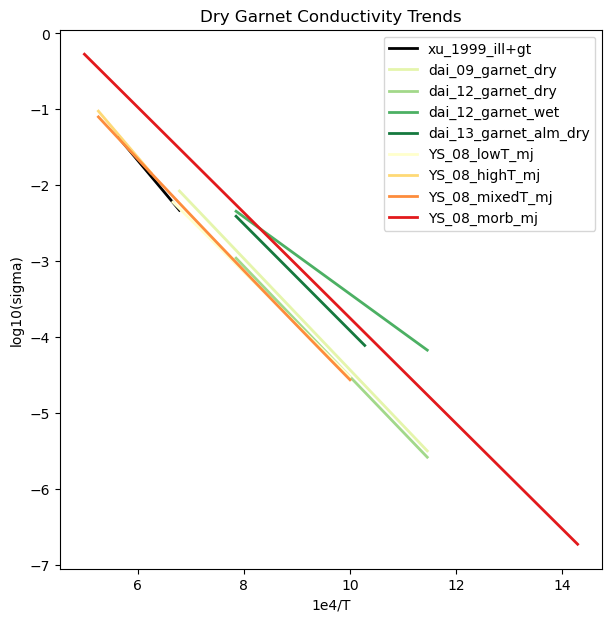

In [68]:
import matplotlib.cm as cm
P = 5 # GPa
t = np.linspace(773,2273,num=100)
logfo2 = pyrutils.calc_QFM(t,P)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('garnet')
fix, ax = plt.subplots(figsize=(7,7))
for i, model in enumerate(filter(lambda x : 'xu' in x, model_names)):
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    temperature_range = np.linspace(ec_model_row['temp_mink'],
                                    ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
    logfo2 = pyrutils.calc_QFM(temperature_range,P)
    ax.plot(1e4/temperature_range,
            np.log10(ec_model.get_conductivity(T=temperature_range,P=P,logfo2=logfo2)),
            linewidth=2,label=model,color='black')
for i, model in enumerate(filter(lambda x : 'dai' in x, model_names)):
    
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    if ec_model.uses_water:
        continue
    temperature_range = np.linspace(ec_model_row['temp_mink'],
                                    ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
    logfo2 = pyrutils.calc_QFM(temperature_range,P)
    ax.plot(1e4/temperature_range,
            np.log10(ec_model.get_conductivity(T=temperature_range,P=P,logfo2=logfo2)),
            linewidth=2,label=model,color=cm.get_cmap('YlGn')(i/5))
    
for i, model in enumerate(filter(lambda x : 'YS' in x, model_names)):
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model     = ecdatabase.get_model(model)
    temperature_range = np.linspace(ec_model_row['temp_mink'],
                                    ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
    logfo2 = pyrutils.calc_QFM(temperature_range,P)
    ax.plot(1e4/temperature_range,
            np.log10(ec_model.get_conductivity(T=temperature_range,P=P,logfo2=logfo2)),
            linewidth=2,label=model,color=cm.get_cmap('YlOrRd')(i/4))
plt.legend()
plt.title('Dry Garnet Conductivity Trends')
plt.xlabel('1e4/T')
plt.ylabel('log10(sigma)')


/var/folders/5h/95y6jy4s2pb02h07pf5q7dgc0000gn/T/ipykernel_45450/4045202548.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  label=model+f' {ppm_h2o} ppm Water',color=cm.get_cmap('cool_r')(i/5))


(-8.0, 0.0)

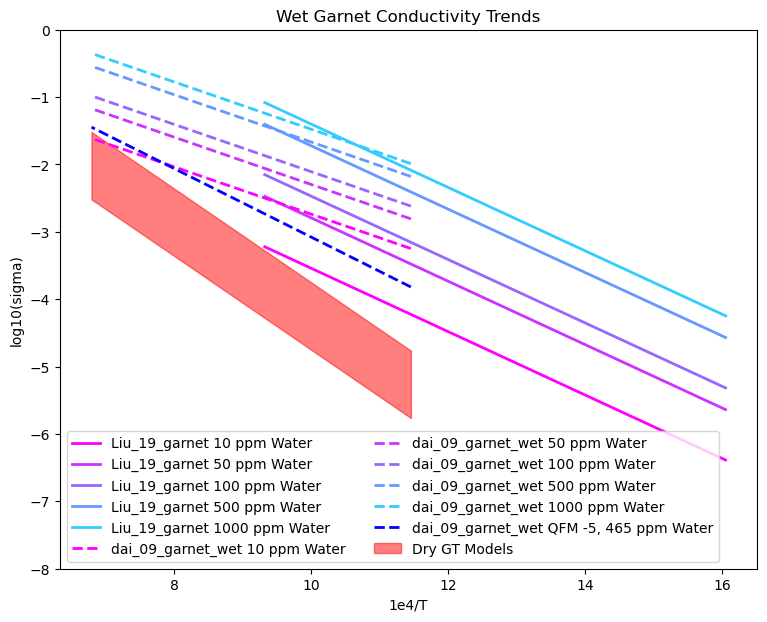

In [72]:
import matplotlib.cm as cm
P = 5 # GPa
t = np.linspace(773,2273,num=100)
logfo2 = pyrutils.calc_QFM(t,P)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('garnet')
model_names = list(filter(lambda x : ecdatabase.get_model_properties(x).iloc[0]['ec_model'].uses_water,
                          model_names))
fix, ax = plt.subplots(figsize=(9,7))
for model in model_names:
    
    if 'dai' in model:
        linestyle= '--'
    else:
        linestyle='-'
    ec_model_row = ecdatabase.get_model_properties(model)
    ec_model = ec_model_row['ec_model'].iloc[0]
    temperature_range = np.linspace(ec_model_row['temp_mink'],
                                    ec_model_row['temp_maxk'],num=100,dtype=float).ravel()
    logfo2 = pyrutils.calc_QFM(temperature_range,P)
    for i, ppm_h2o in enumerate([10,50,100,500,1000]):
        c = ec_model.get_conductivity(T=temperature_range,P=P,
                                               logfo2=logfo2,Cw=ppm_h2o)
        ax.plot(1e4/temperature_range,
            np.log10(c),
            linewidth=2,linestyle=linestyle,
                label=model+f' {ppm_h2o} ppm Water',color=cm.get_cmap('cool_r')(i/5))
        
ec_model_row = ecdatabase.get_model_properties('dai_12_garnet_wet')
ec_model_12 = np.log10(ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range,
                                                                     logfo2=logfo2-5))
ax.plot(1e4/temperature_range,
            ec_model_12,
            linewidth=2,linestyle=linestyle,
                label=model+f' QFM -5, 465 ppm Water',color='b',zorder=8)

ec_model_row = ecdatabase.get_model_properties('YS_08_morb_mj')
ec_model = np.log10(ec_model_row['ec_model'].iloc[0].get_conductivity(T=temperature_range))
ax.fill_between(1e4/temperature_range,ec_model-1,ec_model,label='Dry GT Models',color='red',alpha=0.5) 
plt.legend(ncols=2)
plt.title('Wet Garnet Conductivity Trends')
plt.xlabel('1e4/T')
plt.ylabel('log10(sigma)')
plt.ylim([-8,0])

In [54]:
ec_model_row = ecdatabase.get_model_properties('dai_12_garnet_wet')
ec_model_row

title  \
37  The effect of chemical composition and oxygen ...   

                                               author    year  \
37  Lidong Dai, Heping Li, Haiying Hu, Shuangming ...  2012.0   

                          doi phase_type     description  \
37  10.1007/s00410-011-0693-5     garnet  garnet_hydrous   

                    sample_type                 equation_form  \
37  sintered and single crystal  log10(a + b*log10 fO2 + c/T)   

                  eq_id publication_id  ...   n n_uncertainty n_description  \
37  arrhenious_logfO2_2  DaiKarato2012  ... NaN           NaN           NaN   

     o o_uncertainty o_description   p p_uncertainty p_description  \
37 NaN           NaN           NaN NaN           NaN           NaN   

                                           ec_model  
37  <pyrrhenious.model.Model object at 0x167421550>  

[1 rows x 79 columns]